In [83]:
import pandas as pd
import numpy as np

In [84]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in cols:
    print(data[i].value_counts())
    print("______________________________________________________")

Survived
0    549
1    342
Name: count, dtype: int64
______________________________________________________
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
______________________________________________________
Sex
male      577
female    314
Name: count, dtype: int64
______________________________________________________
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
______________________________________________________
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
______________________________________________________
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
______________________________________________________


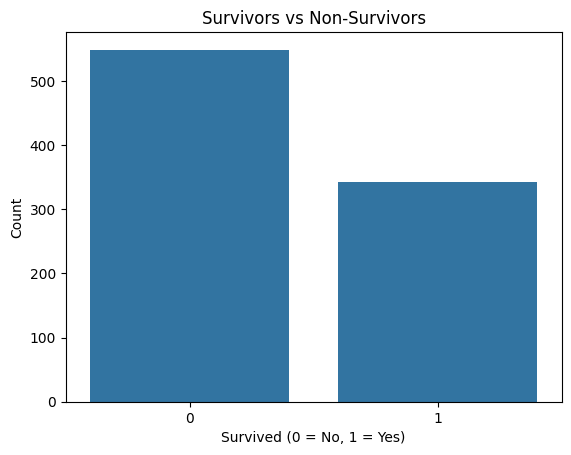

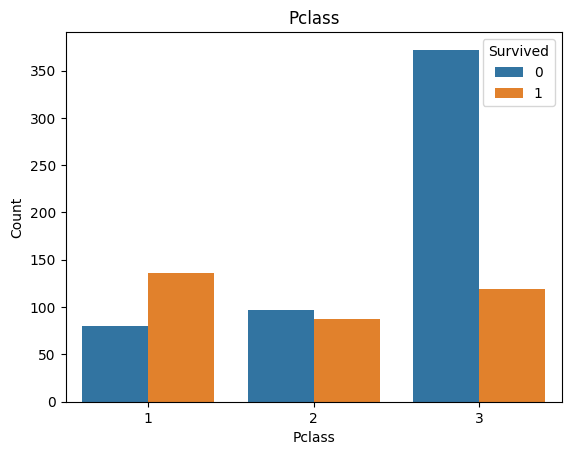

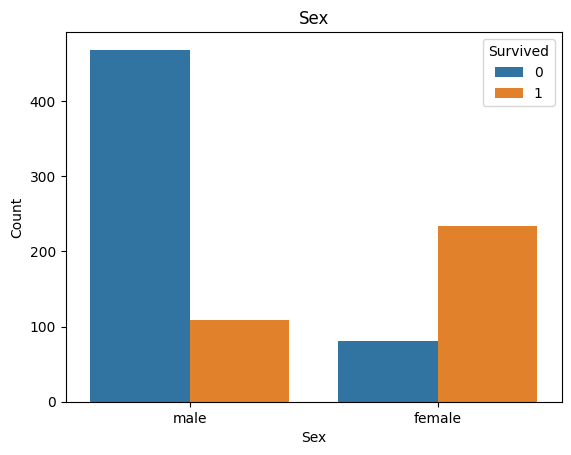

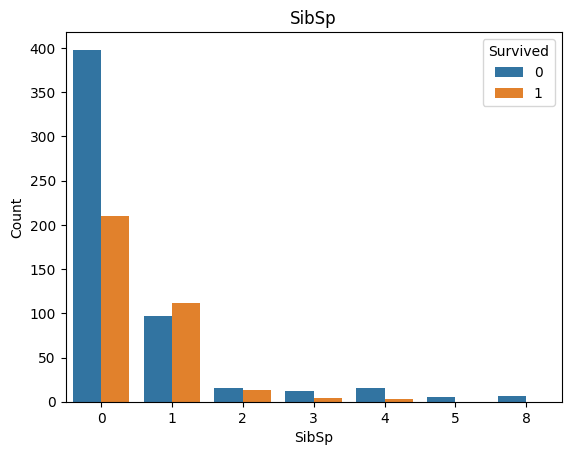

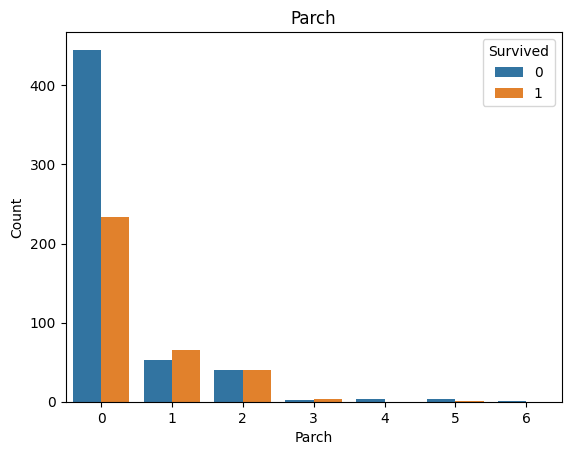

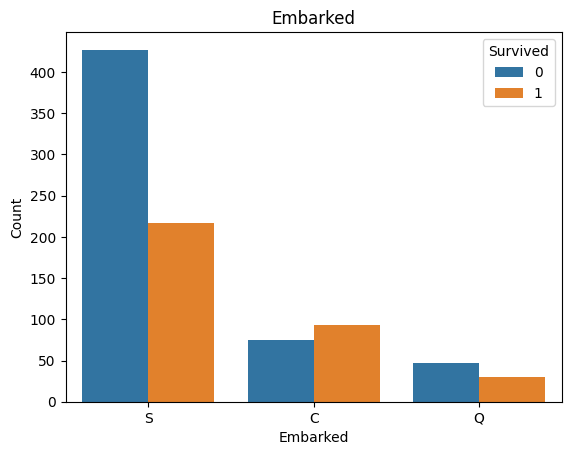

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survivors vs Non-Survivors')
plt.show()

new_cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for i in new_cols:
    sns.countplot(x=f'{i}', data=data, hue="Survived")
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.title(f'{i}')
    plt.show()



array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

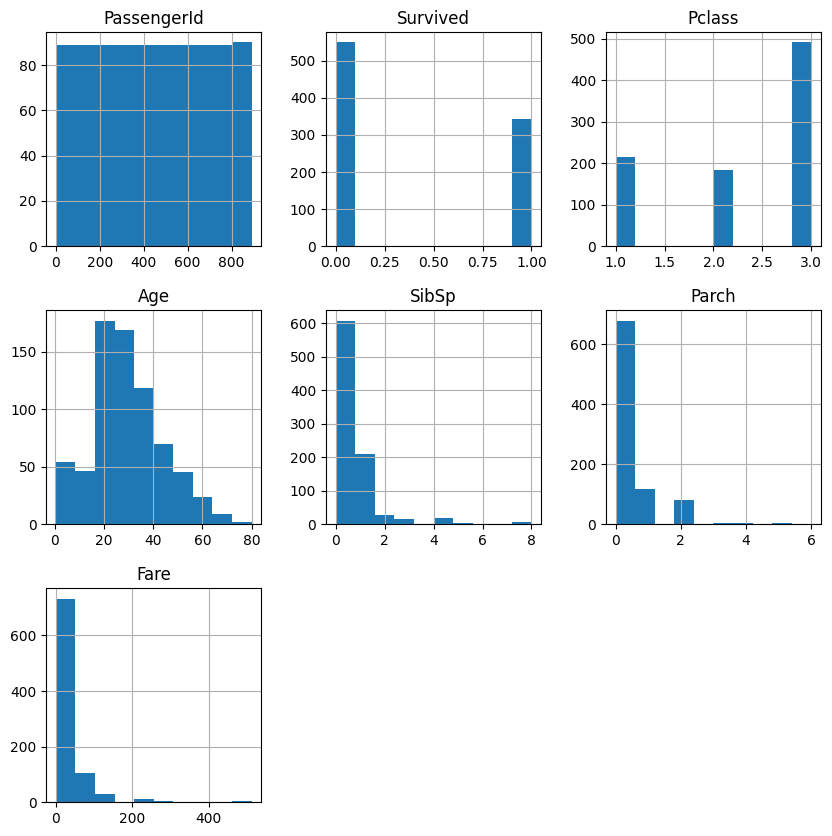

In [89]:
data[data.columns].hist(figsize=(10,10))

In [90]:
def get_title(name):
    for part in name.split():
        if '.' in part:
            return part
    return ''

data["Title"] = data["Name"].apply(get_title)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [91]:
data = data.drop("Name", axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [92]:
data = data.drop("PassengerId", axis=1)

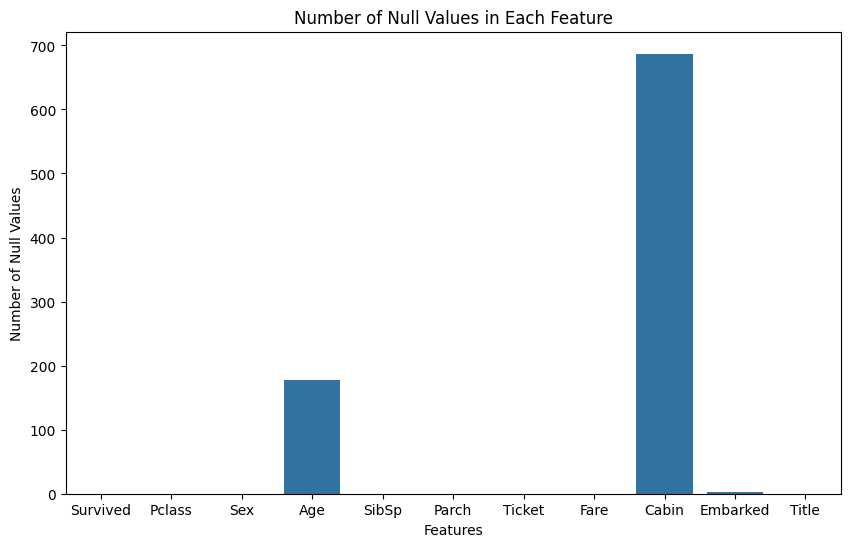

In [93]:
null_counts = data.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in Each Feature')
plt.show()

In [94]:
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode())

<Axes: xlabel='AgeGroup', ylabel='count'>

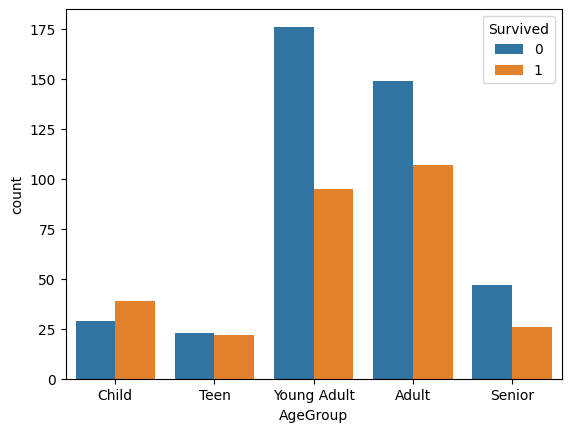

In [95]:
age_bins = [0, 12, 18, 30, 50, 80]  
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

sns.countplot(x="AgeGroup", hue="Survived", data=data)

In [96]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [97]:
data['Cabin_Letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else None)

In [98]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,Cabin_Letter
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,Young Adult,None
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,Adult,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,Young Adult,None
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.,Adult,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.,Adult,None


In [99]:
data.drop(["AgeGroup"], axis=1, inplace=True)

In [100]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Letter
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,None
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,None
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.,None


In [101]:
data["Ticket"].nunique()

681

In [102]:
def get_ticket_prefix(ticket):
    parts = ticket.split()
    
    for part in parts:
        if contains_letters(part):
            return part
        elif contains_dot_or_slash(part):
            return part
    
    return None

def contains_letters(text):
    for char in text:
        if char.isalpha():
            return True
    return False

def contains_dot_or_slash(text):
    for char in text:
        if char == '.' or char == '/':
            return True
    return False

data['Ticket_Prefix'] = data['Ticket'].apply(get_ticket_prefix)


In [103]:
data['Ticket_Prefix'].value_counts()

Ticket_Prefix
PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [104]:
null_count = data['Ticket_Prefix'].isnull().sum()
print(f'The number of None/NaN values in Ticket_Prefix is: {null_count}')


The number of None/NaN values in Ticket_Prefix is: 661


In [105]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Letter,Ticket_Prefix
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.,C,None
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.,None,None


In [106]:
data.drop("Ticket", axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Cabin_Letter,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs.,C,None
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr.,None,None


In [107]:
data.drop("Cabin", axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix
0,0,3,male,22.0,1,0,7.2500,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,None
4,0,3,male,35.0,0,0,8.0500,S,Mr.,None,None


In [108]:
data["Ticket_Prefix"] = data["Ticket_Prefix"].fillna("Unknown")
data["Ticket_Prefix"].value_counts()

Ticket_Prefix
Unknown       661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
F.C.C.          5
C               5
SC/PARIS        5
S.O.C.          5
SC/Paris        4
LINE            4
A/4             3
PP              3
A/4.            3
S.O./P.P.       3
SC/AH           3
A.5.            2
A./5.           2
P/PP            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.W./PP         1
F.C.            1
A/S             1
SO/C            1
W/C             1
SC              1
SCO/W           1
SW/PP           1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [109]:
data.groupby(["Ticket_Prefix"])[["Survived"]].mean()

,Survived
Ticket_Prefix,
A./5.,0.000000
A.5.,0.000000
A/4,0.000000
A/4.,0.000000
A/5,0.100000
A/5.,0.142857
A/S,0.000000
A4.,0.000000
C,0.400000


In [110]:
prefix_counts = data["Ticket_Prefix"].value_counts()

data['Ticket_Prefix_Max'] = data['Ticket_Prefix'].apply(
    lambda x: x if prefix_counts[x] >= 5 else 'Other'
)
print(data['Ticket_Prefix_Max'].value_counts())

Ticket_Prefix_Max
Unknown       661
PC             60
Other          50
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
SC/PARIS        5
S.O.C.          5
C               5
F.C.C.          5
Name: count, dtype: int64


In [111]:
data.groupby(["Ticket_Prefix_Max"])[["Survived"]].mean()

,Survived
Ticket_Prefix_Max,
A/5,0.100000
A/5.,0.142857
C,0.400000
C.A.,0.481481
CA,0.000000
CA.,0.125000
F.C.C.,0.800000
Other,0.280000
PC,0.650000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

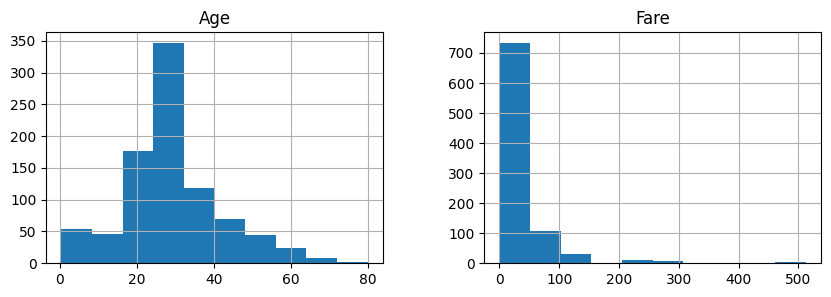

In [112]:
data[["Age", "Fare"]].hist(figsize=(10,3))

In [113]:
data.drop("Ticket_Prefix", axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix_Max
0,0,3,male,22.0,1,0,7.2500,S,Mr.,None,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,None,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,Unknown
4,0,3,male,35.0,0,0,8.0500,S,Mr.,None,Unknown


In [114]:
data["Cabin_Letter"] = data["Cabin_Letter"].fillna("Unknown")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Cabin_Letter,Ticket_Prefix_Max
0,0,3,male,22.0,1,0,7.2500,S,Mr.,Unknown,A/5
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,C,PC
2,1,3,female,26.0,0,0,7.9250,S,Miss.,Unknown,STON/O2.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,C,Unknown
4,0,3,male,35.0,0,0,8.0500,S,Mr.,Unknown,Unknown


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

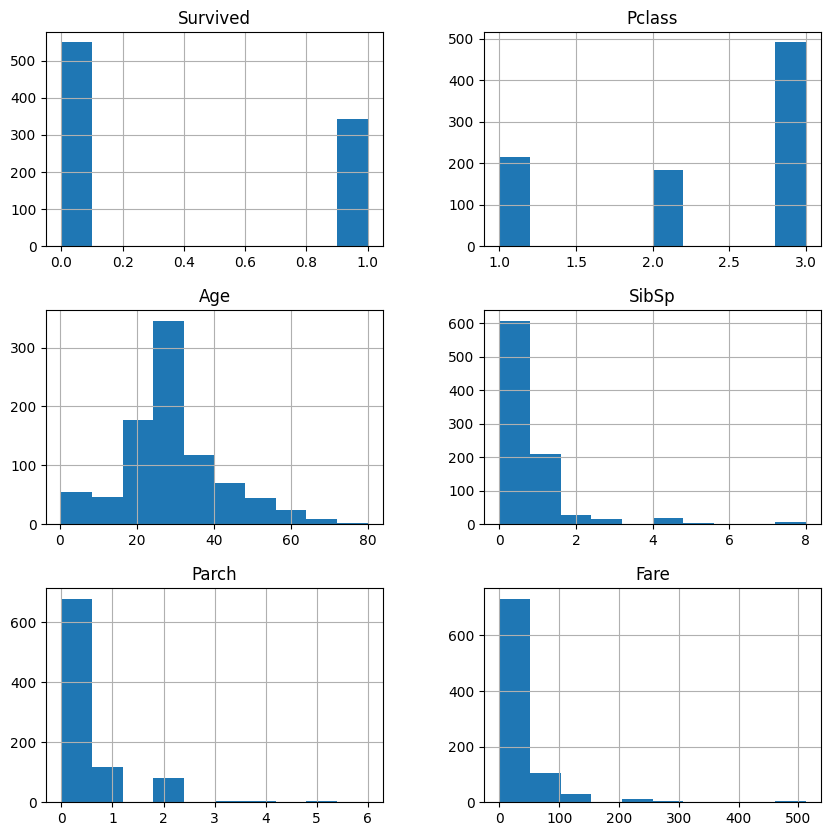

In [115]:
data[data.columns].hist(figsize=(10,10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

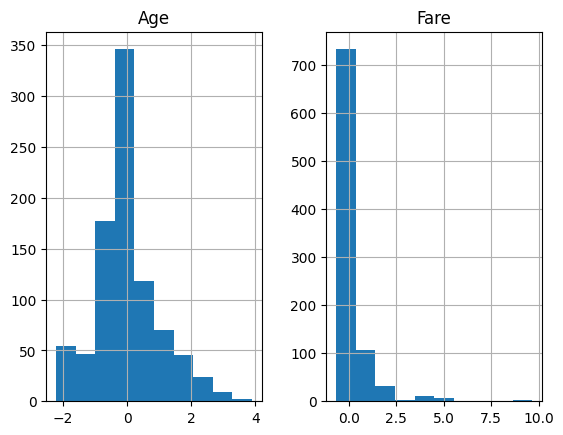

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

data[["Age", "Fare"]].hist()

In [117]:
from sklearn.preprocessing import LabelEncoder

data_xgb = data.copy()

# Initialize label encoders and encode categorical columns
label_encoders = {}
for col in ['Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Prefix_Max']:
    le = LabelEncoder()
    data_xgb[col] = le.fit_transform(data_xgb[col])
    label_encoders[col] = le  # Save the encoder if needed later (e.g., for test data)

# Ensure Pclass is treated as an integer (already numeric)
data_xgb['Pclass'] = data_xgb['Pclass'].astype(int)

# Verify data types
print(data_xgb.dtypes)

Survived               int64
Pclass                 int32
Sex                    int32
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
Embarked               int32
Title                  int32
Cabin_Letter           int32
Ticket_Prefix_Max      int32
dtype: object


In [80]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define features and target
X_xgb = data_xgb.drop('Survived', axis=1)
y = data_xgb['Survived']

# Split into training and testing sets (80-20 split)
X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(X_xgb, y, test_size=0.3, random_state=42)

# Initialize and train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_xgb, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_xgb)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Accuracy: 0.7910


In [119]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Copy dataset for XGBoost
data_xgb = data.copy()

# Label encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Prefix_Max']:
    le = LabelEncoder()
    data_xgb[col] = le.fit_transform(data_xgb[col])
    label_encoders[col] = le


# Define features and target
X_xgb = data_xgb.drop('Survived', axis=1)
y = data_xgb['Survived']

# Split data (for final evaluation after GridSearchCV)
X_train_xgb, X_test_xgb, y_train, y_test = train_test_split(X_xgb, y, test_size=0.2, random_state=42)


from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_xgb, y_train)

# Best parameters and score
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")

# Evaluate on test set with best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)
print(f"XGBoost Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\naren\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.8356
XGBoost Test Accuracy: 0.8101


Logistic Regression

In [81]:
# Copy the dataset for Logistic Regression
data_lr = data.copy()

# One-hot encode categorical columns
data_lr = pd.get_dummies(data_lr, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Prefix_Max'], drop_first=True)

# Check the new columns
print(data_lr.columns)


Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Col.', 'Title_Countess.',
       'Title_Don.', 'Title_Dr.', 'Title_Jonkheer.', 'Title_Lady.',
       'Title_Major.', 'Title_Master.', 'Title_Miss.', 'Title_Mlle.',
       'Title_Mme.', 'Title_Mr.', 'Title_Mrs.', 'Title_Ms.', 'Title_Rev.',
       'Title_Sir.', 'Cabin_Letter_B', 'Cabin_Letter_C', 'Cabin_Letter_D',
       'Cabin_Letter_E', 'Cabin_Letter_F', 'Cabin_Letter_G', 'Cabin_Letter_T',
       'Cabin_Letter_Unknown', 'Ticket_Prefix_Max_A/5.', 'Ticket_Prefix_Max_C',
       'Ticket_Prefix_Max_C.A.', 'Ticket_Prefix_Max_CA',
       'Ticket_Prefix_Max_CA.', 'Ticket_Prefix_Max_F.C.C.',
       'Ticket_Prefix_Max_Other', 'Ticket_Prefix_Max_PC',
       'Ticket_Prefix_Max_S.O.C.', 'Ticket_Prefix_Max_SC/PARIS',
       'Ticket_Prefix_Max_SOTON/O.Q.', 'Ticket_Prefix_Max_SOTON/OQ',
       'Ticket_Prefix_Max_STON/O', 'Ticket_Prefix_Max_STON/O2.',
       'Ticket_Prefix_M

In [ ]:
from sklearn.linear_model import LogisticRegression

X_lr = data_lr.drop('Survived', axis=1)
y = data_lr['Survived']

X_train_lr, X_test_lr, y_train, y_test = train_test_split(X_lr, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_lr, y_train)

y_pred_lr = lr_model.predict(X_test_lr)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Accuracy: 0.8156


In [ ]:
from sklearn.preprocessing import StandardScaler

# Copy dataset for Logistic Regression
data_lr = data.copy()

# One-hot encode categorical features
data_lr = pd.get_dummies(data_lr, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_Letter', 'Ticket_Prefix_Max'], drop_first=True)

# Define features and target
X_lr = data_lr.drop('Survived', axis=1)
y = data_lr['Survived']

# Split data
X_train_lr, X_test_lr, y_train, y_test = train_test_split(X_lr, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_lr, y_train)

print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_lr.best_score_:.4f}")

# Evaluate on test set with best model
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_lr)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8273
Logistic Regression Test Accuracy: 0.8101
